In [3]:
# ======================
# 1. Import Library
# ======================
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
# ======================
# 2. Load Dataset
# ======================
df_sms = pd.read_csv("spam.csv", encoding="latin-1")

# ambil kolom penting saja
df_sms = df_sms[['v1', 'v2']]
df_sms.columns = ['label', 'message']

print(df_sms.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:

# ======================
# 3. Text Preprocessing
# ======================

# lowercase
df_sms['clean_message'] = df_sms['message'].str.lower()

# hapus tanda baca
df_sms['clean_message'] = df_sms['clean_message'].apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation))
)

# tokenisasi
df_sms['tokens'] = df_sms['clean_message'].apply(word_tokenize)

# stopwords removal
stop_words = set(stopwords.words('english'))
df_sms['tokens_not_stop'] = df_sms['tokens'].apply(
    lambda words: [w for w in words if w not in stop_words]
)

# stemming
stemmer = PorterStemmer()
df_sms['stemmed'] = df_sms['tokens_not_stop'].apply(
    lambda words: [stemmer.stem(w) for w in words]
)

print(df_sms[['message', 'clean_message', 'tokens_not_stop', 'stemmed']].head())

                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  \
0  go until jurong point crazy available only in ...   
1                            ok lar joking wif u oni   
2  free entry in 2 a wkly comp to win fa cup fina...   
3        u dun say so early hor u c already then say   
4  nah i dont think he goes to usf he lives aroun...   

                                     tokens_not_stop  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, goes, usf, lives, around

In [6]:
# ======================
# 4. Save Preprocessed Data
# ======================
df_sms.to_csv('sms_preprocessed.csv', index=False)


In [7]:
# ======================
# 5. Exploratory Data Analysis (EDA)
# ======================

# hitung kata terbanyak di spam
spam_words = Counter(
    [w for words in df_sms[df_sms['label'] == 'spam']['tokens_not_stop'] for w in words]
)

# hitung kata terbanyak di ham
ham_words = Counter(
    [w for words in df_sms[df_sms['label'] == 'ham']['tokens_not_stop'] for w in words]
)

print("Top 10 Spam Words:", spam_words.most_common(10))
print("Top 10 Ham Words:", ham_words.most_common(10))


Top 10 Spam Words: [('call', 347), ('free', 216), ('2', 173), ('txt', 150), ('u', 147), ('ur', 144), ('mobile', 123), ('text', 120), ('4', 119), ('claim', 113)]
Top 10 Ham Words: [('u', 972), ('im', 449), ('2', 305), ('get', 303), ('ltgt', 276), ('ok', 272), ('dont', 257), ('go', 247), ('got', 243), ('ur', 240)]


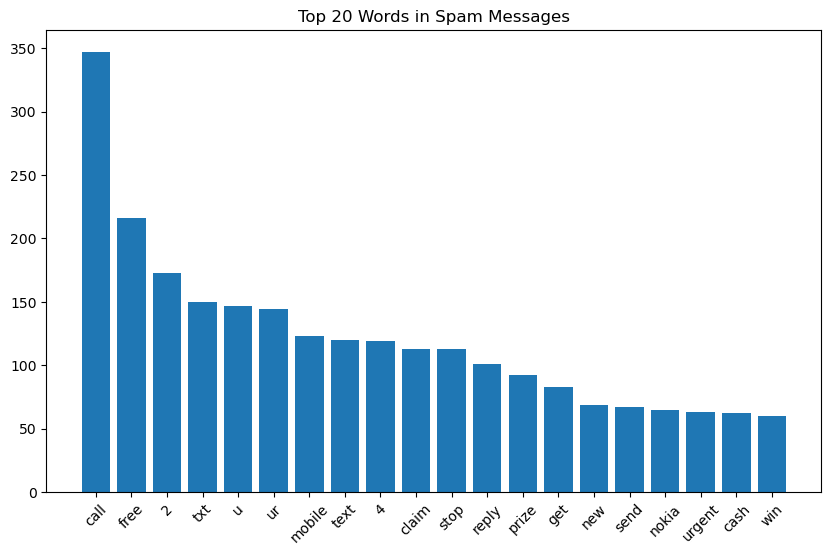

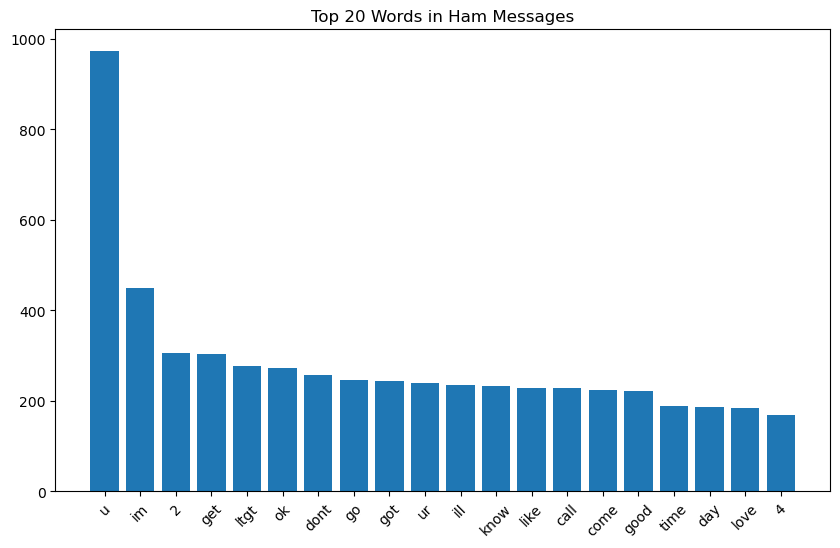

In [8]:

# ======================
# 6. Visualisasi Kata Terbanyak
# ======================

# spam
spam_top20 = spam_words.most_common(20)
spam_words_, spam_counts_ = zip(*spam_top20)

plt.figure(figsize=(10,6))
plt.bar(spam_words_, spam_counts_)
plt.title("Top 20 Words in Spam Messages")
plt.xticks(rotation=45)
plt.show()

# ham
ham_top20 = ham_words.most_common(20)
ham_words_, ham_counts_ = zip(*ham_top20)

plt.figure(figsize=(10,6))
plt.bar(ham_words_, ham_counts_)
plt.title("Top 20 Words in Ham Messages")
plt.xticks(rotation=45)
plt.show()

In [9]:

# ======================
# 7. (Opsional) Siap ke Tahap Modeling
# ======================
# contoh split dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(
    df_sms['clean_message'], df_sms['label'], test_size=0.2, random_state=42
)

# ubah teks ke vektor
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Shape of X_train:", X_train_vec.shape)
print("Shape of X_test:", X_test_vec.shape)

Shape of X_train: (4457, 8384)
Shape of X_test: (1115, 8384)


  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  \
0  go until jurong point crazy available only in ...   
1                            ok lar joking wif u oni   
2  free entry in 2 a wkly comp to win fa cup fina...   
3        u dun say so early hor u c already then say   
4  nah i dont think he goes to usf he lives aroun...   

                                              tokens  \
0  [go, until, jurong, point, crazy, available, o...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3  [u, dun, say, so, early, hor, u, c, already, t...   
4  [nah, i

In [11]:
df_sms.to_csv('sms_preprocessed.csv', index=False)
